In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset 

In [3]:
df = pd.read_csv('cleaned_churn_data.csv')
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Month-to-Month,Yes,Credit Card,70.15,70.15,0.00,0,42.09,112.24,Churned
4831,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
4832,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
4833,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined


## Check if there is a Class Imbalance

In [7]:
df['Customer Status'].value_counts(normalize = True)

Customer Status
Stayed     0.623578
Churned    0.328025
Joined     0.048397
Name: proportion, dtype: float64

* About 63%  stayed 
* About 34% Churned and 
* Less than 4% Joined
#### SO it is safe to say the data balanced

In [10]:
def hist_imbalance():
    plt.figure(figsize=(6,4))
    sns.countplot(x= df['Customer Status'],
                 data = df,
                 color = 'red')
    plt.title('Distribution of Target Variable')
    plt.xlabel('Customer Status')
    plt.ylabel('count')
    plt.show()

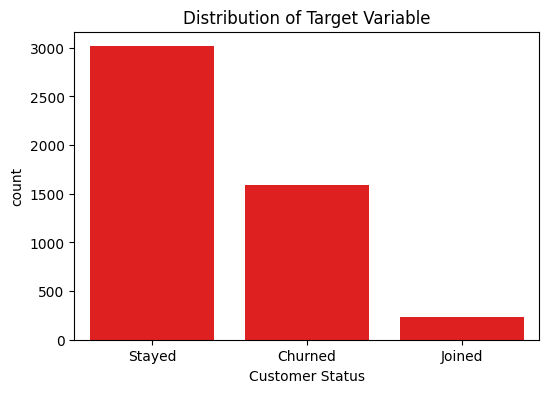

In [12]:
hist_imbalance()

## Univariate Analysis on Numerical features

In [15]:
numeric_cols_np = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols_np

['Age',
 'Number of Dependents',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

#### Check outliers for the Numerical Data

In [18]:
## Numerical columns for analysis 
Numerical_feaures = ['Age''Monthly Charge','Total Charges','Total Long Distance Charges','Total Revenue']
Target = df['Customer Status']

In [38]:
def outlier_boxplot(df):
    Numerical_feaures = ['Age','Monthly Charge','Total Charges',
                         'Total Long Distance Charges',
                         'Total Revenue','Tenure in Months']
    Target = df['Customer Status']
    for feature in Numerical_feaures:
        plt.figure(figsize=(8,6))
        sns.boxplot(x = Target, hue = Target, 
                    y = feature, data = df, palette = 'viridis',
                    legend=False)
        plt.title('Distribution of Numerical Feature')
        plt.xlabel('Customer Status', size = 12 )
        plt.ylabel(feature, size = 12 )
        plt.show()

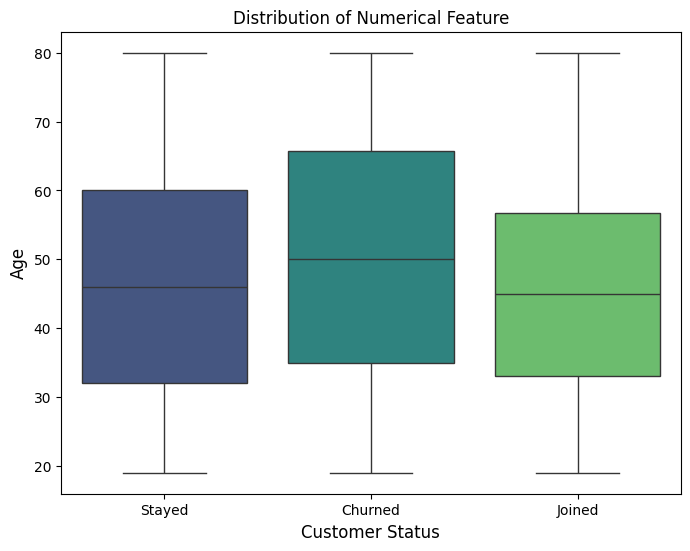

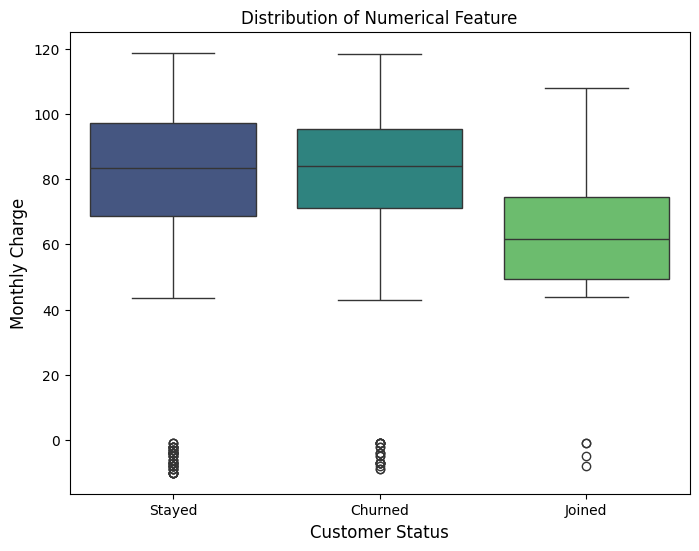

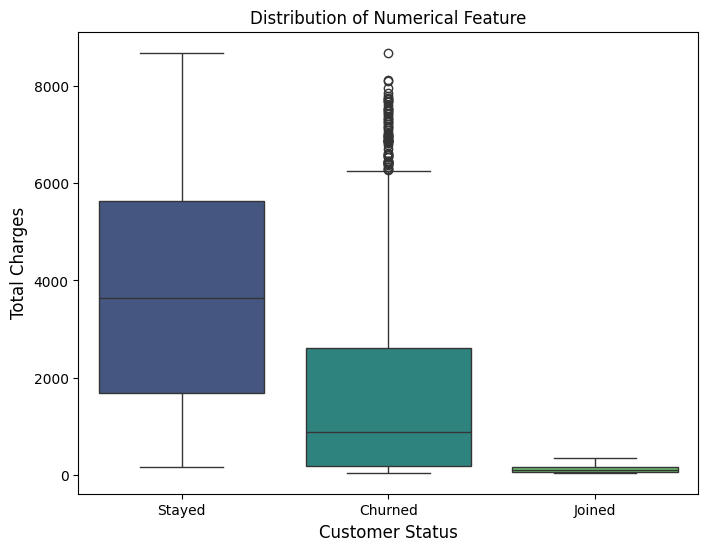

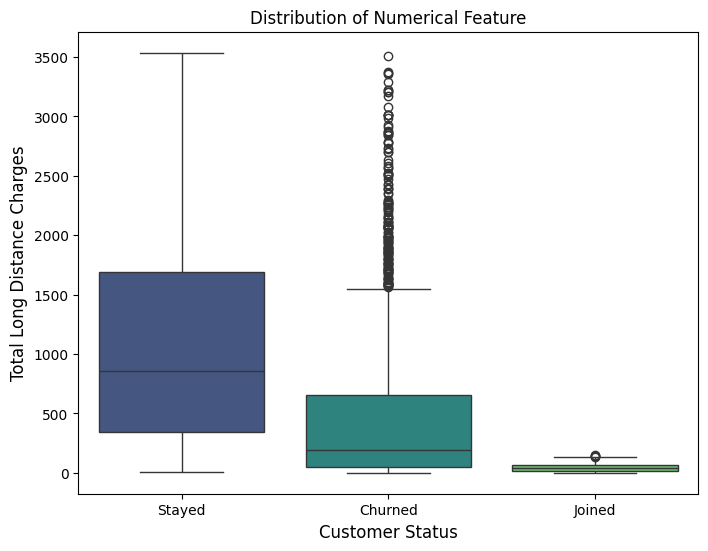

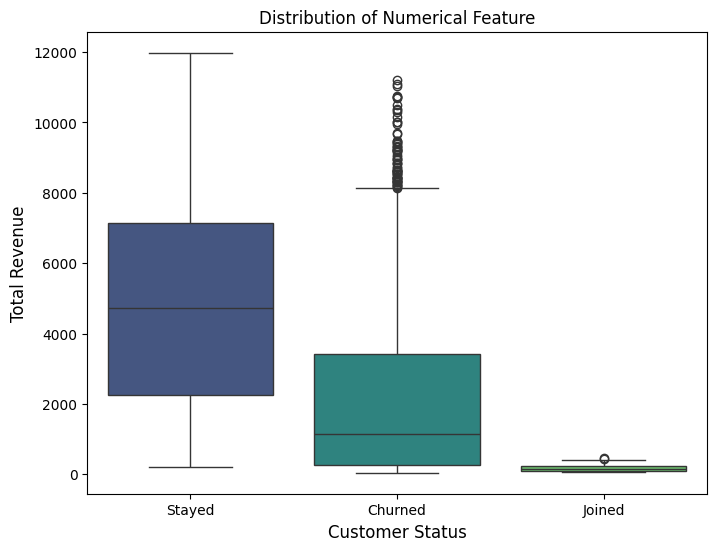

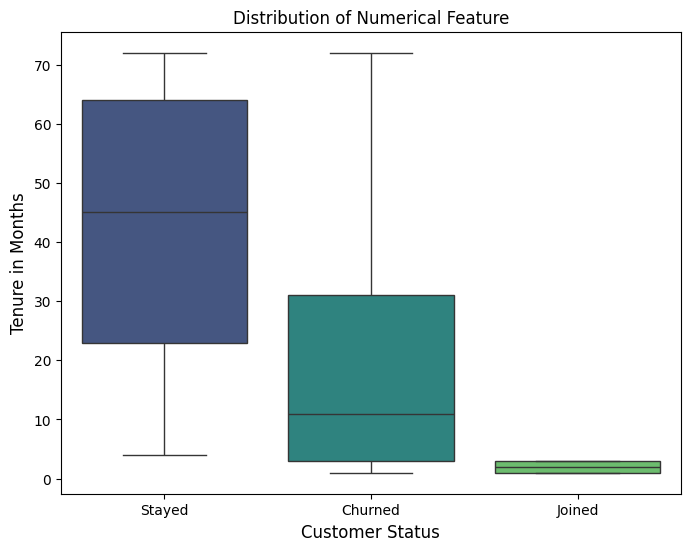

In [40]:
 outlier_boxplot(df)

### Key Takeawys
* Age have a good prediction Power In identifying Churned customers.
* Monthly Charge have less predictive power in identifying 'Stayed' and 'Churned' customers.
* Total Charge, Total Revenue and Total long distance charges have more Predictive power  in identifying 'Stayed' and 'Churned' customers.

*  All the above are based on single feature alone.


### Bivariate Analysis on Categorical data 

In [29]:
categorical_cols = df.select_dtypes(include=['category','object']).columns.tolist()
categorical_cols

['Customer ID',
 'Gender',
 'Married',
 'City',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status']

In [30]:
Categorical_cols = [ 'Gender',
 'Married',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']
Target = df['Customer Status']

In [34]:
def bar_categorical(df):
    Categorical_cols = [ 'Gender','Married','Phone Service','Multiple Lines','Internet Service',
                            'Internet Type','Online Security','Online Backup','Device Protection Plan',
                            'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music',
                            'Unlimited Data','Contract','Paperless Billing','Payment Method']
    Target = df['Customer Status']
    for feature in Categorical_cols:
        plt.figure(figsize = (8,6))
        sns.countplot(data=df, x=Target, hue= feature, palette='viridis')
        # sns.barplot(data = df, x = Target, y = feature,
        #            hue = Target)
        plt.title("Distribution of Categorical colmns")
        plt.xlabel('Customer Status')
        plt.ylabel(feature)
        plt.show()

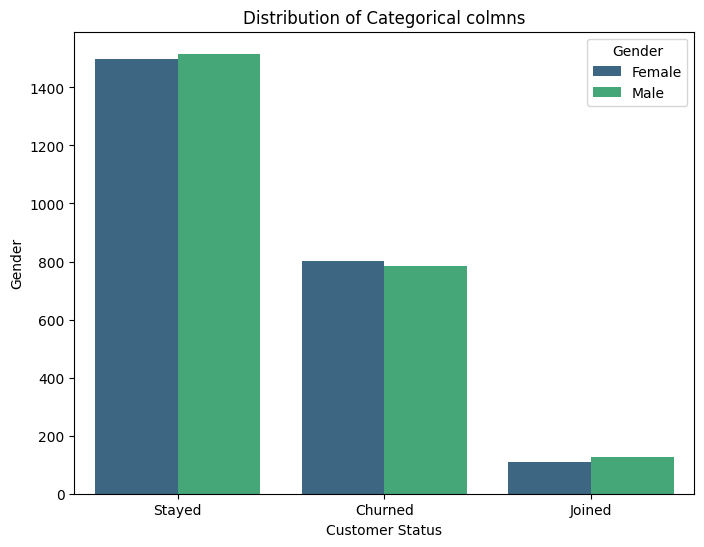

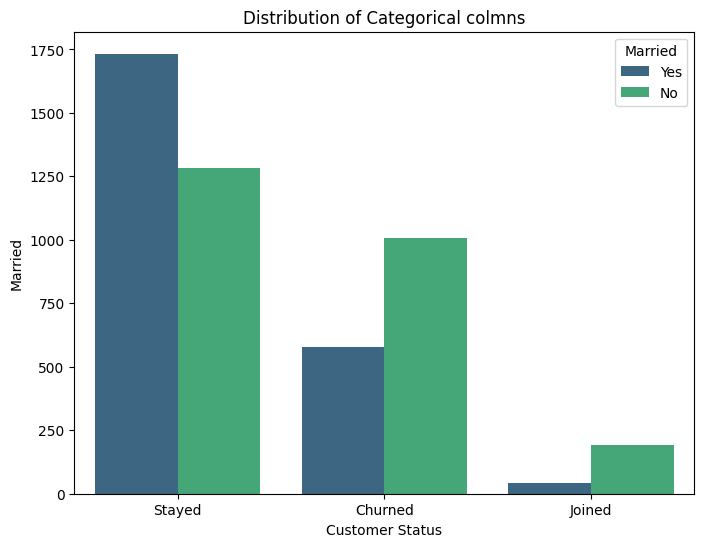

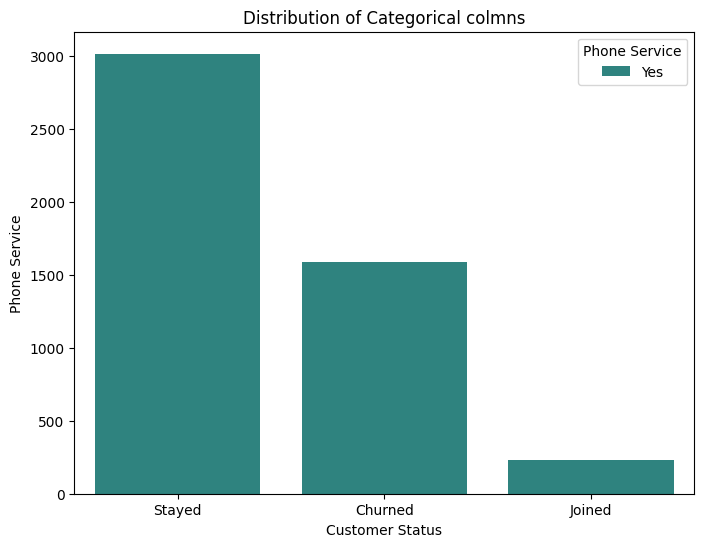

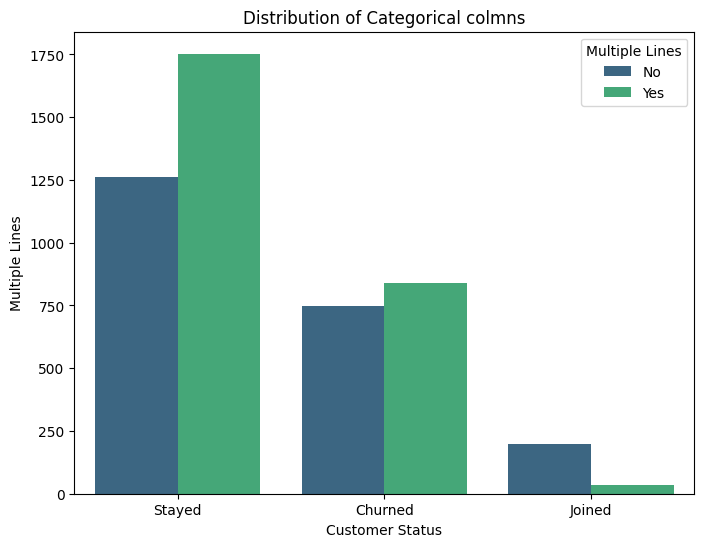

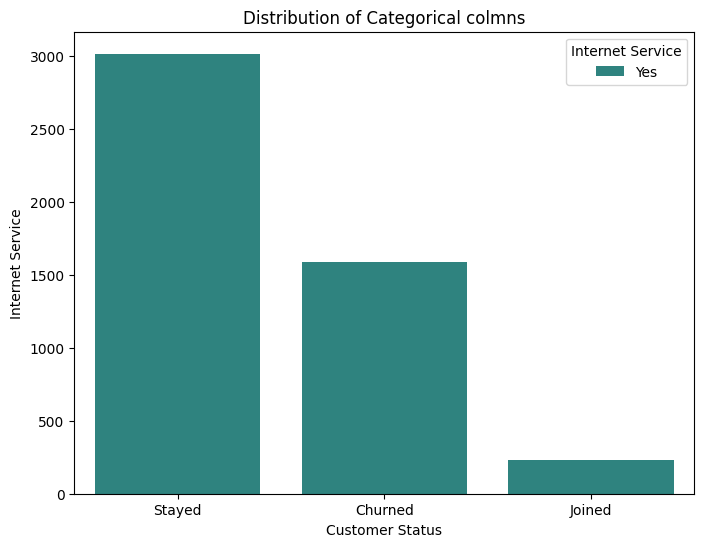

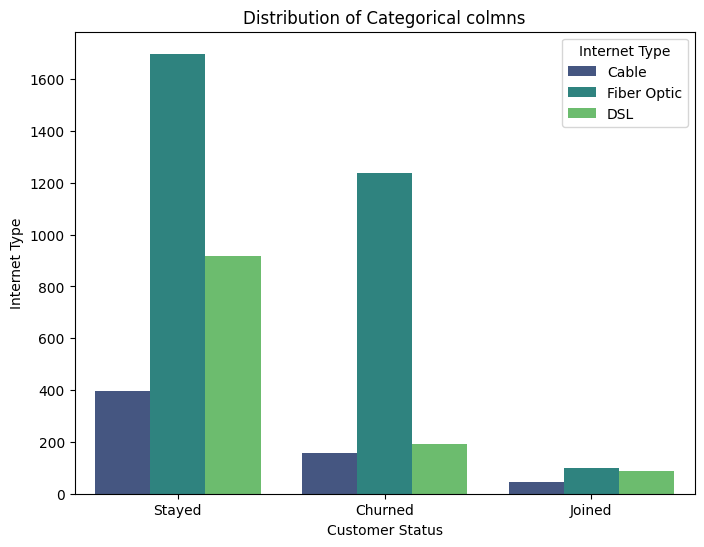

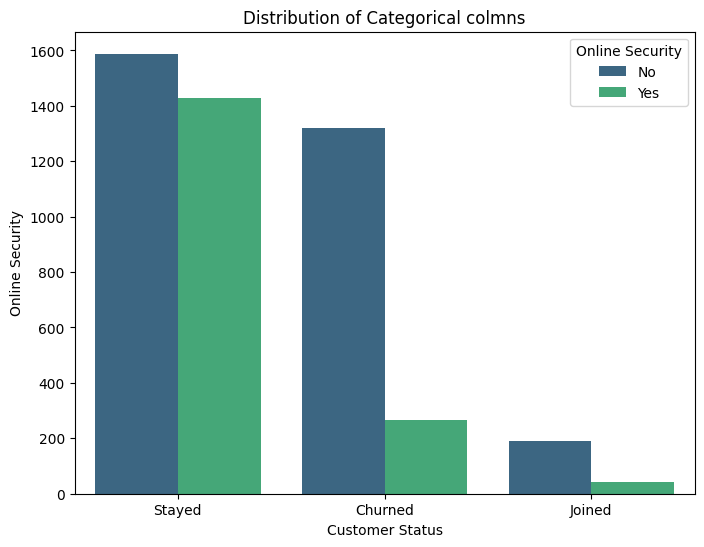

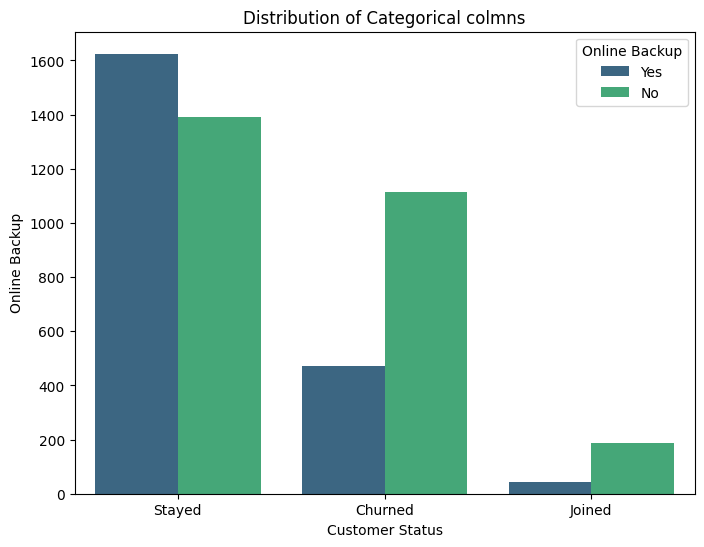

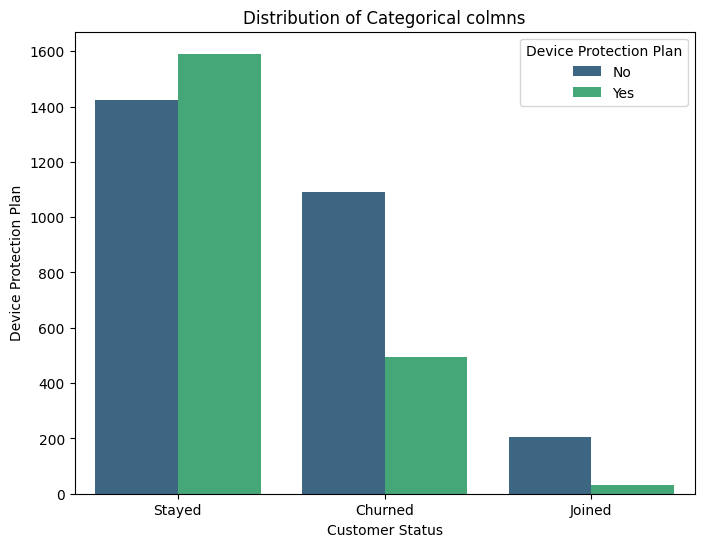

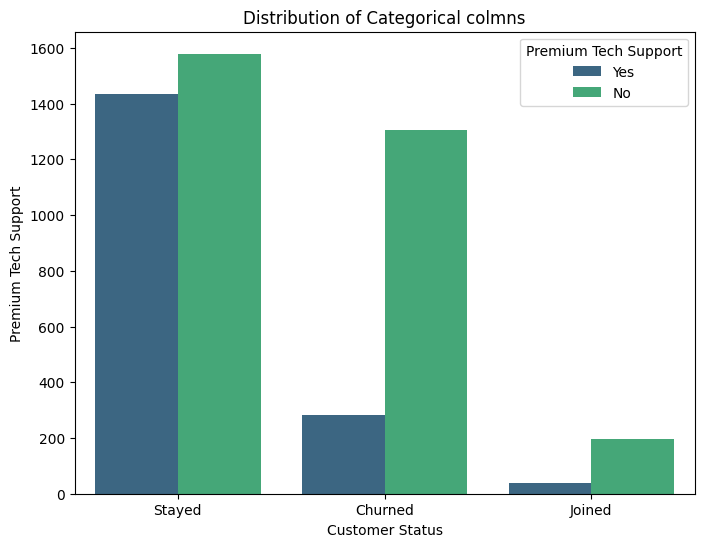

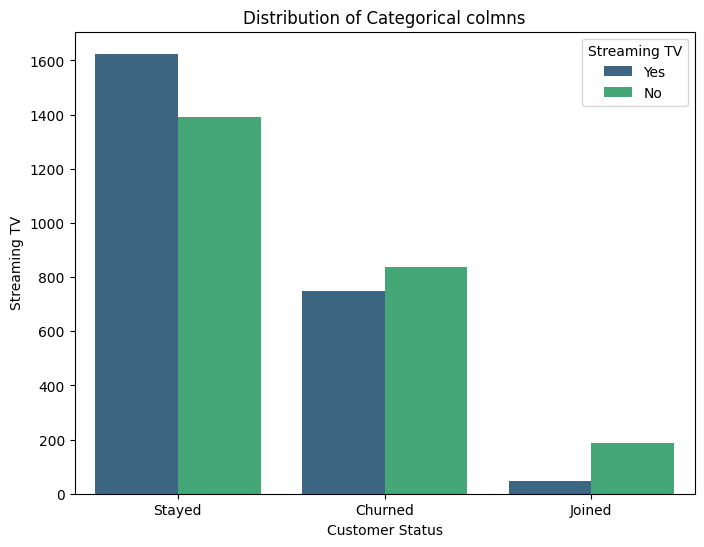

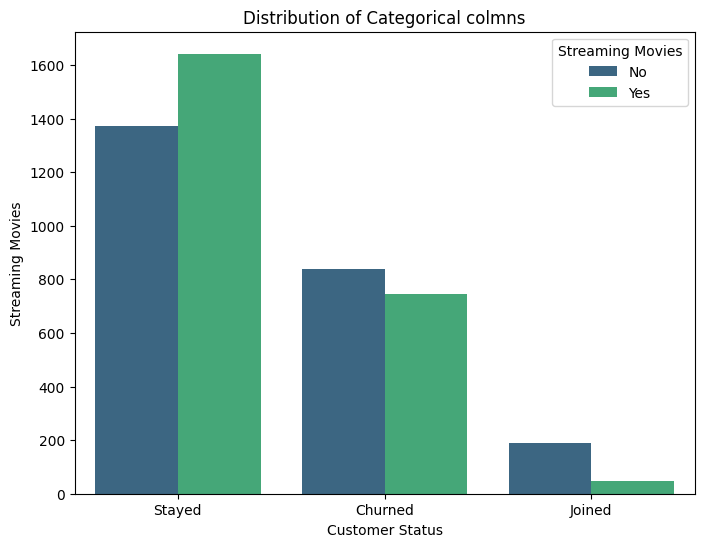

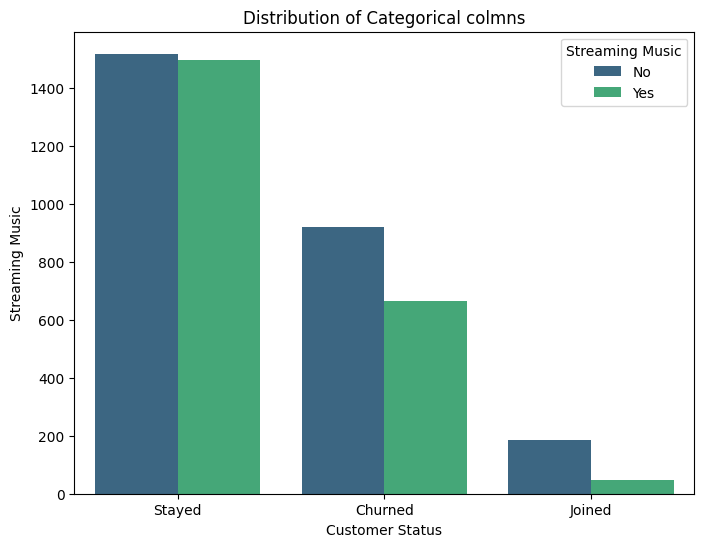

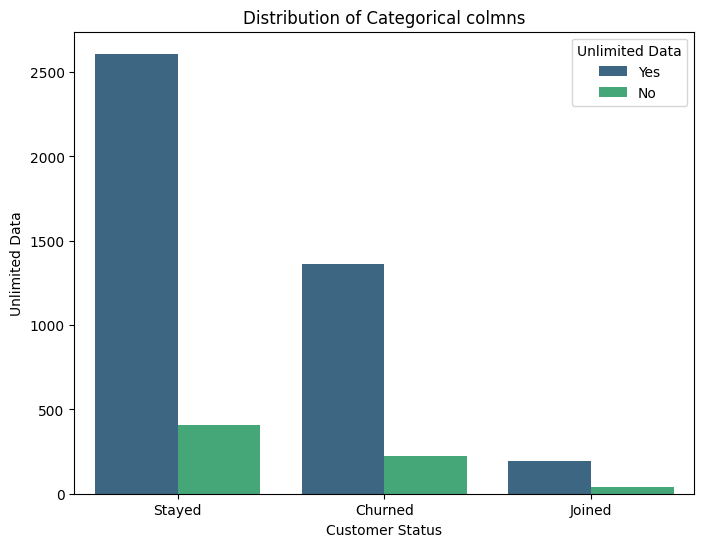

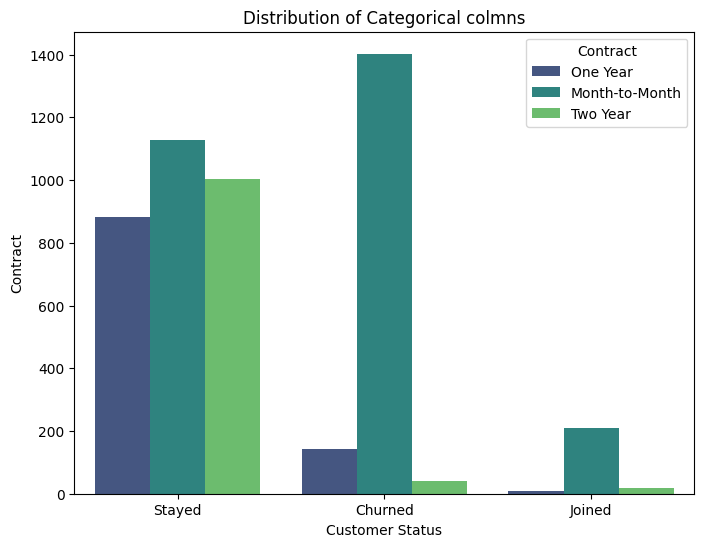

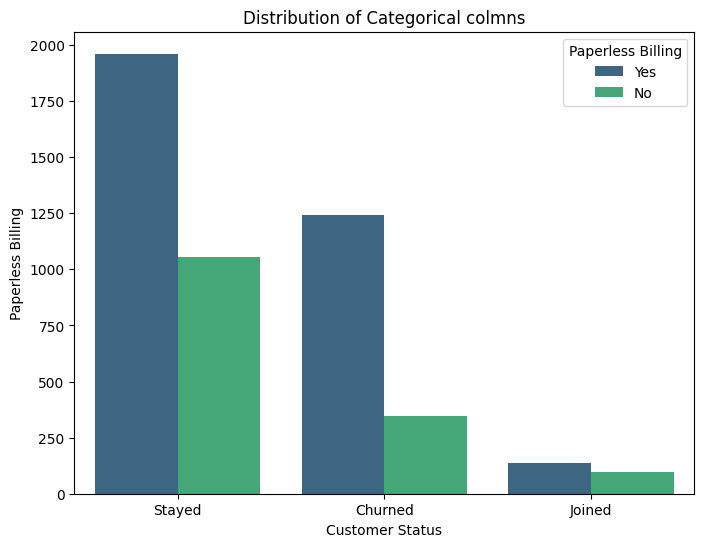

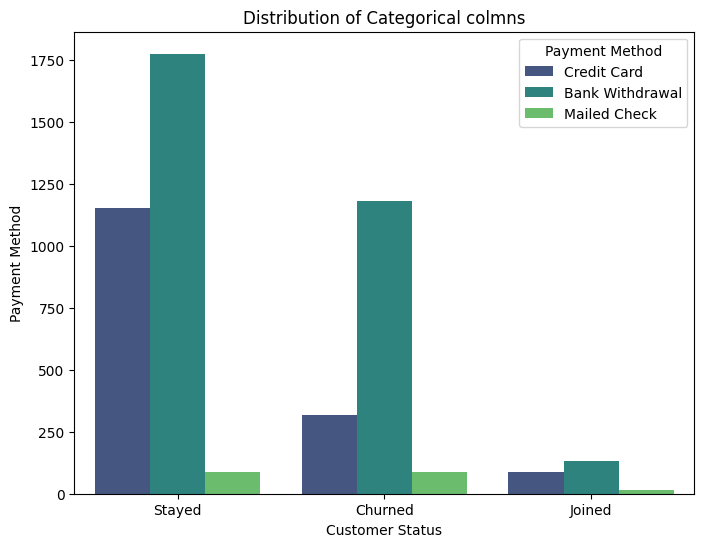

In [36]:
bar_categorical(df)